In [9]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Specify the file path
file_path = '../rl/single/trade_data_single.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

print(df.head())


   Unnamed: 0        date   tic        open        high         low  \
0           0  2022-07-01  AAPL  136.039993  139.039993  135.660004   
1           1  2022-07-05  AAPL  137.770004  141.610001  136.929993   
2           2  2022-07-06  AAPL  141.350006  144.119995  141.080002   
3           3  2022-07-07  AAPL  143.289993  146.550003  143.279999   
4           4  2022-07-08  AAPL  145.259995  147.550003  145.000000   

        close      volume  day      macd     boll_ub     boll_lb     rsi_30  \
0  137.375778  71051600.0  4.0 -2.314819  147.969103  126.404709  45.052172   
1  139.976334  73353800.0  1.0 -1.889308  147.422312  126.573771  46.691399   
2  141.321106  74064300.0  2.0 -1.427125  146.870237  126.807449  47.528765   
3  144.712769  66253700.0  3.0 -0.778192  146.297573  127.146754  49.594541   
4  145.395020  64547800.0  4.0 -0.206476  146.067276  127.286076  50.004132   

      cci_30      dx_30  close_30_sma  close_60_sma        vix  turbulence  
0 -36.495764  17.0583

10974.715713500977


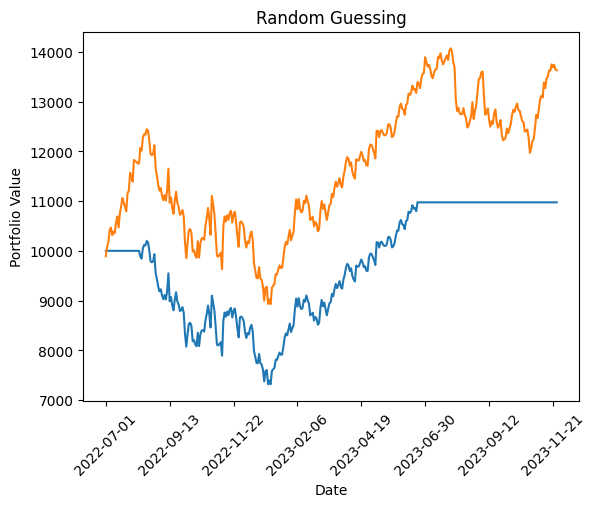

In [36]:
initial_cash = 10000
stocks = 0
cash = initial_cash
total = 0
portfolio_value = []

# pick a random action for each row but it should be a valid action
action_history = []
for index, row in df.iterrows():
    action = random.choice([-1, 0, 1])
    scaling_factor = random.random()
    action = int((action * 100) * scaling_factor)
    action_history.append(action)
    if action == 1 and cash > 0:
        stocks = cash // row['close']
        cash = 0
    elif action == -1 and stocks > 0:
        cash = stocks * row['close']
        stocks = 0
    total = cash + stocks * row['close']
    portfolio_value.append(total)

print(total)

apple_value = []
# buy and hold apple
stocks = 0
cash = initial_cash
total = 0
for index, row in df.iterrows():
    if cash > 0:
        stocks = cash // row['close']
        cash = 0
    total = stocks * row['close']
    apple_value.append(total)
# plot portfolio value over dates

plt.plot(df['date'], portfolio_value)
plt.plot(df['date'], apple_value)
plt.xticks(df['date'][::50], rotation=45)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title("Random Guessing")
plt.show()




